In [11]:
import pandas as pd
import numpy as np

In [6]:
kb = pd.read_csv('./Kbrevis_Rrs.csv')
kb

,Station,pa11_b,pa24,pa24c,pa8,pas10,pas3b,pas3c,pas5,pas8,...,gc2_29,gc2_29A,prob27_28,prob28,prob28_29,prob29,prob30,prob31,prob31_32,prob32
0,400,0.002992,0.008970,0.004180,0.007441,0.005501,0.001628,0.002014,0.004256,0.001881,...,0.000686,0.000976,0.001264,0.001324,0.001263,0.001339,0.001296,0.001167,0.001282,0.001434
1,405,0.002974,0.008624,0.004089,0.007209,0.005374,0.001585,0.001956,0.004177,0.001877,...,0.000713,0.001016,0.001320,0.001352,0.001306,0.001367,0.001309,0.001159,0.001275,0.001450
2,410,0.002913,0.008275,0.003951,0.006917,0.005167,0.001522,0.001888,0.004155,0.001828,...,0.000743,0.001065,0.001369,0.001397,0.001326,0.001385,0.001321,0.001147,0.001266,0.001462
3,415,0.002990,0.008041,0.003931,0.006866,0.005169,0.001588,0.001913,0.004289,0.001897,...,0.000769,0.001102,0.001449,0.001448,0.001380,0.001425,0.001346,0.001153,0.001281,0.001492
4,420,0.002959,0.007762,0.003839,0.006683,0.005061,0.001556,0.001904,0.004257,0.001919,...,0.000812,0.001167,0.001505,0.001517,0.001451,0.001477,0.001390,0.001168,0.001317,0.001543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,830,0.000358,0.000438,0.000033,0.000423,0.000302,0.000172,0.000315,0.000489,0.000456,...,0.000090,0.000077,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
87,835,0.000371,0.000472,0.000058,0.000478,0.000306,0.000189,0.000345,0.000448,0.000489,...,0.000081,0.000052,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
88,840,0.000356,0.000455,0.000058,0.000474,0.000291,0.000177,0.000327,0.000448,0.000499,...,0.000080,0.000058,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
89,845,0.000362,0.000474,0.000069,0.000493,0.000293,0.000191,0.000334,0.000469,0.000516,...,0.000080,0.000060,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000


In [19]:
wvs =list(kb['Station'])
wvs_1nm = [i for i in range(400, 721)]

In [20]:
stations = kb.columns[1:]
stations_1nm = {}
for station in stations:
    index = 0
    with_nans = []
    for i in range(400, 721):
        if i in wvs:
            with_nans.append(kb[station][index])
            index+=1
        else:
            with_nans.append(np.nan)
    stations_1nm[station] = with_nans

In [24]:
kb_1nm = pd.DataFrame(columns=['Wavelength'])
kb_1nm['Wavelength'] = wvs_1nm
for station in stations:
    kb_1nm[station] = stations_1nm[station]
kb_1nm = kb_1nm.set_index("Wavelength")

In [27]:
kb_1nm = kb_1nm.interpolate()

In [28]:
kb_1nm

,pa11_b,pa24,pa24c,pa8,pas10,pas3b,pas3c,pas5,pas8,gc2_3a,...,gc2_29,gc2_29A,prob27_28,prob28,prob28_29,prob29,prob30,prob31,prob31_32,prob32
Wavelength,,,,,,,,,,,,,,,,,,,,,
400,0.002992,0.008970,0.004180,0.007441,0.005501,0.001628,0.002014,0.004256,0.001881,0.002453,...,0.000686,0.000976,0.001264,0.001324,0.001263,0.001339,0.001296,0.001167,0.001282,0.001434
401,0.002988,0.008901,0.004162,0.007395,0.005476,0.001619,0.002003,0.004240,0.001881,0.002457,...,0.000691,0.000984,0.001275,0.001330,0.001271,0.001345,0.001299,0.001166,0.001280,0.001437
402,0.002984,0.008832,0.004144,0.007348,0.005450,0.001611,0.001991,0.004225,0.001880,0.002460,...,0.000696,0.000992,0.001286,0.001335,0.001280,0.001350,0.001301,0.001164,0.001279,0.001441
403,0.002981,0.008763,0.004125,0.007302,0.005425,0.001602,0.001979,0.004209,0.001879,0.002464,...,0.000702,0.001000,0.001298,0.001341,0.001289,0.001356,0.001304,0.001162,0.001277,0.001444
404,0.002977,0.008693,0.004107,0.007255,0.005400,0.001593,0.001968,0.004193,0.001878,0.002467,...,0.000707,0.001008,0.001309,0.001346,0.001297,0.001361,0.001306,0.001160,0.001276,0.001447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0.000368,-0.000048,0.000237,0.000053,0.000311,0.000289,0.000459,0.000531,0.000086,0.000244,...,0.000156,0.000185,0.000641,0.000857,0.000809,0.001140,0.001235,0.001264,0.001372,0.001379
717,0.000356,-0.000035,0.000226,0.000054,0.000299,0.000280,0.000467,0.000461,0.000084,0.000229,...,0.000151,0.000179,0.000627,0.000852,0.000800,0.001142,0.001236,0.001271,0.001331,0.001385
718,0.000344,-0.000022,0.000216,0.000054,0.000287,0.000270,0.000475,0.000391,0.000082,0.000214,...,0.000147,0.000173,0.000612,0.000847,0.000791,0.001145,0.001237,0.001278,0.001290,0.001390


In [29]:
kb_1nm.to_csv('./Kbrevis_Rrs_1nm_400-720.csv')

<Axes: xlabel='Wavelength'>

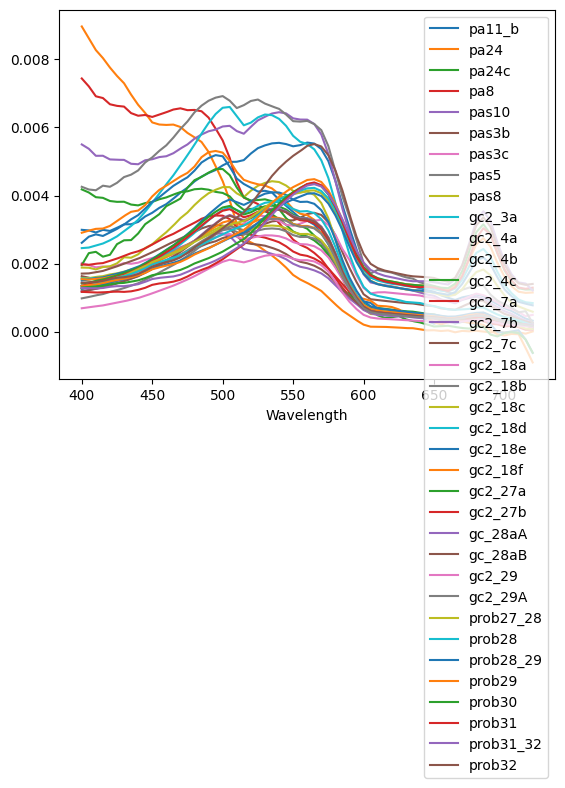

In [30]:
kb_1nm.plot()